In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pylab as plt

In [9]:
X,y = make_regression(n_samples=4,n_features=1,n_targets=1,n_informative=1,noise=80,random_state=20)

In [10]:
X

array([[ 0.88389311],
       [ 0.35753652],
       [-2.34326191],
       [ 0.19586502]])

In [11]:
y

array([  8.5045043 ,  96.83264156, -97.54818266, -53.87566697])

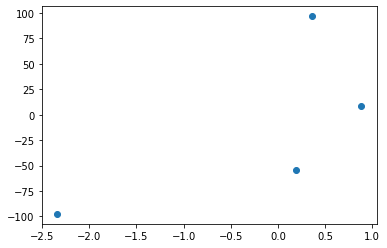

In [12]:
plt.scatter(X,y)

In [15]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()

In [58]:
lr.fit(X,y)

LinearRegression()

In [59]:
lr.coef_

array([40.06462403])

In [60]:
lr.intercept_

-2.447366580221866

In [30]:
b=100
y_pred = (40.06*X + b).reshape(4)

In [31]:
y_pred

array([135.40875809, 114.32291283,   6.12892806, 107.84635278])

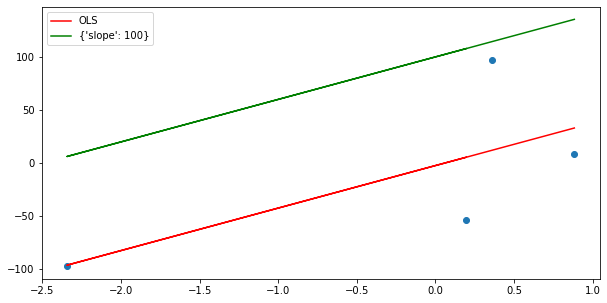

In [37]:
plt.subplots(ncols=1,figsize=(10,5))
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='green',label={'slope':b})
plt.legend()

- Let's apply gradient descent and let m(slope) = 40.06 and b = 0 
- Here, we will try to reach to the optimum value of b, same as we got from above Linear regression class.

In [66]:
#Step-1 : Find out the slope (step_size)
    
#GD(for b) -- b_old = b_new - lr * slope

m=40.06
b=100
l_r=0.01

slope = -2 * np.sum(y - m * X.ravel() - b)

In [67]:
step_size = l_r*slope

In [68]:
step_size

8.19587311072915

In [69]:
#Now,Calculate the intercept

b_new = b - step_size

In [70]:
b_new

91.80412688927085

In [71]:
y_pred = (40.06*X + b_new).reshape(4)

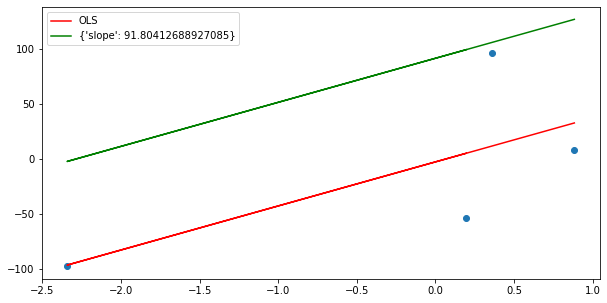

In [72]:
plt.subplots(ncols=1,figsize=(10,5))
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='green',label={'slope':b_new})
plt.legend()

In [63]:
# Second_iteration
slope = -2 * np.sum(y - m * X.ravel() - b_new)

In [73]:
step_size = slope * l_r

In [74]:
step_size

8.19587311072915

In [75]:
b_new = b_new - step_size

In [76]:
b_new

83.6082537785417

In [78]:
y_pred = (40.06*X + b_new).reshape(4)

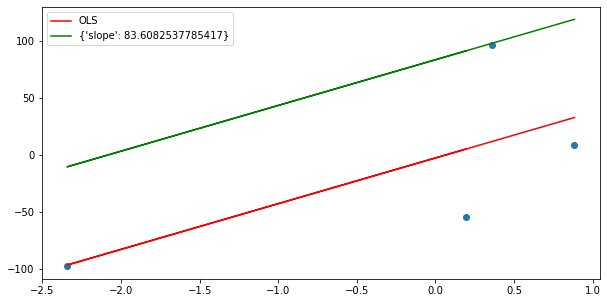

In [79]:
plt.subplots(ncols=1,figsize=(10,5))
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='green',label={'slope':b_new})
plt.legend()

In [80]:
# we can, see are slowly coming towards best fit line that was predicted by OLS algorithm.
# Now, we can put all these steps in a loop and see the results after fix number of epochs.

In [102]:
# Initialize the values of : Let m= constant:40.06 and initialize intercept b=-100

m = 40.06
b= -100
epochs = 100
lr_ = 0.01

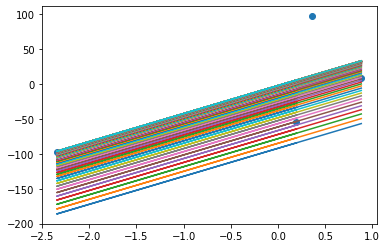

In [105]:
for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)

    y_pred = m * X + b

    plt.plot(X,y_pred)

plt.scatter(X,y)
    
